In [1]:
import lasio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns

In [2]:
def las_read(file):
    las = lasio.read(file)
    header = las.header
    data = las.df()
    data.reset_index(inplace = True)
    return data, header

### Importing all the files

In [53]:
# TRM2
df1_sonic, h11 = las_read('TRM2_data/1202125650_20190118P_TRM2_Elan_Petrophysical_Analysis_w_EC_logs.las')
df1_elan, h12 = las_read('TRM2_data/1202125650_20190118P_TRM2_Elan_Petrophysical_Analysis.las')
df1_rho, h121 = las_read('TRM2_data/1202125650_20181203_TRM2_2A_PEX-AIT_MAIN_CUSTOMER_R1_E85I_03.las')

# CCS1
df2_sonic, h21 = las_read('CCS1_data/1211523415_20090426m_Sonic_P_and_S_Output_7240ft_350ft.las')
df2_elan, h22 = las_read('CCS1_data/1211523415_2020_CCS1_Elan_CoreCal.las')
df2_rho, h23 = las_read('CCS1_data/1211523415_20200727_CCS1_Compiled_Raw_Logs_Petrel.las')

# VW1
df3_sonic, h31 = las_read('VW1_data/1211523460_20101116_VW1_PandS_5250-7228.las')
df3_elan, h32 = las_read('VW1_data/1211523460_2020_VW1_Elan_CoreCal.las')

# CCS2
df4_sonic, h41 = las_read('CCS2_data/1211523713_20150503_Sonic_Intermediate_Anisotropy_PnS_350_5120ft.las')
df4_elan, h42 = las_read('CCS2_data/1211523713_20150529_ELAN_PetrophysicalAnalysis_344-7200ft.las')

# VW2
df5_sonic, h51 = las_read('VW2_data/1211523552_20121031_Sonic_PNS.las')
df5_elan, h52 = las_read('VW2_data/1211523552_20121030_ELAN_iteration_v20160209.las')

In [67]:
df1_rho

,DEPT,AF10,AF20,AF30,AF60,AF90,AO10,AO20,AO30,AO60,...,RSOZ,RWA_HILT,RXO8,RXOZ,SP,SPAR,STIT,TENS,TNPH,HTNP_SAN
0,3779.0,0.4764,1950.0000,1950.0000,11.5792,48.4876,0.4811,1950.0000,67.7791,2.6583,...,NaN,NaN,NaN,NaN,123.8542,122.7078,0.0,1941.5001,0.1745,0.1754
1,3779.5,0.4820,1950.0000,1950.0000,13.8162,58.7088,0.4970,1950.0000,23.7720,1.8150,...,NaN,NaN,NaN,NaN,123.8542,122.7078,0.0,1941.5001,0.1903,0.1912
2,3780.0,0.4873,1950.0000,1950.0000,17.5568,72.8832,0.5029,1950.0000,9.3152,1.4301,...,NaN,NaN,NaN,NaN,123.8542,122.7078,0.0,1941.5001,0.2045,0.2058
3,3780.5,0.4905,1950.0000,1950.0000,22.7377,83.5370,0.5710,1950.0000,4.1366,1.2197,...,NaN,NaN,NaN,NaN,123.8542,122.7078,0.0,1941.5001,0.2076,0.2070
4,3781.0,0.4896,1950.0000,1950.0000,26.5802,77.9089,0.4597,10.7333,2.5461,1.0510,...,NaN,NaN,NaN,NaN,123.8542,122.7078,0.0,1941.5001,0.2027,0.2032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,6484.0,1950.0000,23.5081,551.4368,1891.1958,1950.0000,1950.0000,31.0843,1559.4730,1943.7262,...,0.3185,NaN,45.856,45.856,-207.1429,-207.7332,0.0,1898.5001,NaN,NaN
5411,6484.5,1950.0000,23.5081,551.4368,1891.1958,1950.0000,1950.0000,31.0843,1559.4730,1943.7262,...,0.3185,NaN,45.856,45.856,-204.5192,-206.5435,0.0,1906.5001,NaN,NaN
5412,6485.0,1950.0000,23.5081,551.4368,1891.1958,1950.0000,1950.0000,31.0843,1559.4730,1943.7262,...,0.3185,NaN,45.856,45.856,-202.3558,-205.4128,0.0,1915.5000,NaN,NaN
5413,6485.5,1950.0000,23.5081,551.4368,1891.1958,1950.0000,1950.0000,31.0843,1559.4730,1943.7262,...,0.3185,NaN,45.856,45.856,-202.8795,-204.0961,0.0,1804.5714,NaN,NaN


In [69]:
df1_elan

,MD,BOUND_WATER,CALCITE,CHLORITE,DOLOMITE,DRY_WEIGHT_CALCITE,DRY_WEIGHT_CHLORITE,DRY_WEIGHT_DOLOMITE,DRY_WEIGHT_HEMATITE,DRY_WEIGHT_ILLITE,...,KSDR_PY,PHIT,PIGE,PIGN,QUARTZ,RHGA_GEO,SW,SWE,UWATER,VCL_GEO
0,4357.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4357.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4358.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4358.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4359.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4215,6464.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.97026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4216,6465.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.36904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4217,6465.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4218,6466.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
def adjust_depth(df):
    df['DEPT'] = df['DEPT'].apply(
        lambda x: 
        float(f"{int(x)}.25") if str(x).endswith('.0') else (float(f"{int(x)}.75") if str(x).endswith('.5') else x))
    return df
df1_rho = adjust_depth(df1_rho)

In [54]:
# Adjusting Depth values for VW2 Well
def adjust_depth(df):
    df['MD'] = df['MD'].apply(
        lambda x: 
        float(f"{int(x)}.0") if str(x).endswith('.2') else (float(f"{int(x)}.5") if str(x).endswith('.7') else x))
    return df
df5_elan = adjust_depth(df5_elan)

### Dataset Rearrangement

In [72]:
# Merging Datasets
merged_df1 = pd.merge(df1_elan, df1_sonic, on='MD')
merged_df1 = merged_df1.rename(columns={'MD': 'DEPT'})
merged_df1 = pd.merge(df1_rho, merged_df1, on='DEPT')

df2_elan_renamed = df2_elan.rename(columns={'MD': 'DEPT'})
merged_df2 = pd.merge(df2_elan_renamed, df2_sonic, on='DEPT')

df3_elan_renamed = df3_elan.rename(columns={'MD': 'DEPT'})
merged_df3 = pd.merge(df3_elan_renamed, df3_sonic, on='DEPT')

df4_elan_renamed = df4_elan.rename(columns={'MD': 'DEPT'})
merged_df4 = pd.merge(df4_elan_renamed, df4_sonic, on='DEPT')

df5_elan_renamed = df5_elan.rename(columns={'MD': 'DEPT'})
merged_df5 = pd.merge(df5_elan_renamed, df5_sonic, on='DEPT')

In [73]:
# Excluding Hematite and making a df with columns we need
def get_proper_columns(df, cols_list):
    df_cols = cols_list
    df_a = df[df_cols]
    return df_a

In [74]:
merged_df4.columns

Index(['DEPT', 'ANHYDRITE', 'BFV', 'BOUND_WATER', 'BS_x', 'CALCITE',
       'CHLORITE', 'DOLOMITE', 'DRY_WEIGHT_ANHYDRITE', 'DRY_WEIGHT_CALCITE',
       'DRY_WEIGHT_CHLORITE', 'DRY_WEIGHT_DOLOMITE', 'DRY_WEIGHT_ILLITE',
       'DRY_WEIGHT_K_FELDSPAR', 'DRY_WEIGHT_KAOLINITE',
       'DRY_WEIGHT_N_FELDSPAR', 'DRY_WEIGHT_PYRITE', 'DRY_WEIGHT_QUARTZ',
       'DSOZ', 'GR_x', 'GR_EDTC', 'HCAL', 'HCGR', 'HSGR', 'ILLITE',
       'K_FELDSPAR', 'KAOLINITE', 'KINT_GEO', 'KSDRBB', 'N_FELDSPAR', 'NPOR',
       'NPOR_LIM_EC', 'NPOR_SAN_EC', 'PEFZ', 'PHIT', 'PIGE', 'PIGN', 'PYRITE',
       'QUARTZ', 'RHGA_GEO', 'RHOZ_x', 'RLA1', 'RLA2', 'RLA3', 'RLA4', 'RLA5',
       'RSOZ', 'RXOZ', 'SW', 'SXO', 'T2CUTOFF', 'T2LM', 'TCMR', 'UGAS',
       'UIWATER', 'UOIL', 'UWATER', 'UZ', 'XGAS', 'XIWATER', 'XOIL', 'XWATER',
       'GR_y', 'RHOZ_y', 'BS_y', 'P1AZ', 'SDEVM', 'HAZIM', 'RB', 'DEVI',
       'HD1_PPC1', 'HD1_PPC2', 'HD2_PPC1', 'HD2_PPC2', 'TENS', 'HDAR',
       'MINXENE_OVERALL', 'MAXXENE_OVERALL', 'FSH_A

In [75]:
# Reordering and renaming datasets to a consistent format
cols_1 = ['BOUND_WATER_x','CALCITE_x','CHLORITE_x','DOLOMITE_x',#'HEMATITE',
            'ILLITE_x','K-FELDSPAR_x','KAOLINITE_x','QUARTZ_x','UWATER_x', 
              'DEPT', 'DTCO', 'DTSH_FAST', 'RHOZ']
df1 = get_proper_columns(merged_df1, cols_1)
df1 = df1.rename(columns={'DTSH_FAST': 'DTSM_FAST', 'BOUND_WATER_x':'BOUND_WATER',
                          'CALCITE_x':'CALCITE','CHLORITE_x':'CHLORITE','DOLOMITE_x':
                          'DOLOMITE', 'ILLITE_x':'ILLITE','K-FELDSPAR_x':'K-FELDSPAR',
                          'KAOLINITE_x':'KAOLINITE','QUARTZ_x':'QUARTZ','UWATER_x':'UWATER'})

cols_2 = ['BOUND_WATER','CALCITE','CHLORITE','DOLOMITE',#'HEMATITE',
            'ILLITE','K-FELDSPAR','KAOLINITE','QUARTZ','UWATER', 'DEPT', 'DTCO', 'DTSM_FAST','RHOZ']
df2 = get_proper_columns(merged_df2, cols_2)

cols_3 = ['BOUND_WATER','CALCITE','CHLORITE','DOLOMITE',#'HEMATITE',
            'ILLITE','K-FELDSPAR','KAOLINITE','QUARTZ','UWATER', 'DEPT', 'DTCO', 'DTSM_FAST', 'RHOZ']
df3 = get_proper_columns(merged_df3, cols_3)

cols_4 = ['BOUND_WATER','CALCITE','CHLORITE','DOLOMITE',#'HEMATITE',
            'ILLITE','K_FELDSPAR','KAOLINITE','QUARTZ','UWATER', 'DEPT', 'DTCO', 'DTSM_FAST', 'RHOZ_x']
df4 = get_proper_columns(merged_df4, cols_4)
df4 = df4.rename(columns={'K_FELDSPAR': 'K-FELDSPAR', 'RHOZ_x': 'RHOZ'})

cols_5 = ['BOUND_WATER','CALCITE','CHLORITE','DOLOMITE',#'HEMATITE',
            'ILLITE','K_FELDSPAR','KAOLINITE','QUARTZ','UWATER', 'DEPT', 'DTCO', 'DTSM', 'RHOZ_x']
df5 = get_proper_columns(merged_df5, cols_5)
df5 = df5.rename(columns={'DTSM': 'DTSM_FAST', 'K_FELDSPAR': 'K-FELDSPAR', 'RHOZ_x': 'RHOZ'})

In [76]:
df1

,BOUND_WATER,CALCITE,CHLORITE,DOLOMITE,ILLITE,K-FELDSPAR,KAOLINITE,QUARTZ,UWATER,DEPT,DTCO,DTSM_FAST,RHOZ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4357.25,49.79515,93.15175,2.7406
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4357.75,50.36954,91.55038,2.7000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4358.25,50.84312,89.19648,2.6437
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4358.75,50.95559,84.40200,2.6214
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4359.25,50.59177,81.83669,2.7036
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6464.75,NaN,NaN,NaN
4216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6465.25,NaN,NaN,NaN
4217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6465.75,NaN,NaN,NaN
4218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6466.25,NaN,NaN,NaN


### Handling Missing Data

In [77]:
# Percent of Records Missing
def missing_value_percent(df):
    total_records = len(df)
    total_missing = df.isnull().sum().sum()
    percent_missing_total = (total_missing / (total_records * len(df.columns))) * 100
    print(percent_missing_total)

In [78]:
missing_value_percent(df1)

1.2085308056872037


In [79]:
missing_value_percent(df2)

2.803885534260961


In [80]:
missing_value_percent(df3)

0.0


In [81]:
missing_value_percent(df4)

0.018991398479105505


In [82]:
missing_value_percent(df5)

1.7743182267603863


In [83]:
def missing_drop(df):
    df = df.dropna()
    df.reset_index(inplace=True)
    df=df.drop(columns =['index'])
    return df

In [84]:
df1 = missing_drop(df1)
df2 = missing_drop(df2)
df3 = missing_drop(df3)
df4 = missing_drop(df4)
df5 = missing_drop(df5)

In [85]:
df5

,BOUND_WATER,CALCITE,CHLORITE,DOLOMITE,ILLITE,K-FELDSPAR,KAOLINITE,QUARTZ,UWATER,DEPT,DTCO,DTSM_FAST,RHOZ
0,0.03771,0.0,0.03154,0.47394,0.22472,0.02298,0.06837,0.09192,0.00000,5306.5,67.74281,121.77684,2.58802
1,0.03764,0.0,0.02957,0.45919,0.22500,0.02624,0.07058,0.10495,0.00000,5307.0,64.68021,122.02647,2.54553
2,0.03624,0.0,0.02738,0.48194,0.21705,0.02351,0.06929,0.09403,0.00000,5307.5,62.02827,121.66800,2.52025
3,0.03400,0.0,0.01668,0.55457,0.20693,0.01022,0.07604,0.04086,0.00000,5308.0,60.95219,121.04729,2.50908
4,0.03380,0.0,0.01240,0.59635,0.20720,0.00000,0.08069,0.00000,0.00000,5308.5,64.22356,120.51717,2.51096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,0.00000,0.0,0.00000,0.23565,0.00000,0.33617,0.00000,0.31129,0.01499,7174.0,47.26740,89.87509,2.98712
3736,0.00000,0.0,0.00000,0.24785,0.00000,0.33411,0.00000,0.30520,0.01499,7174.5,47.31889,89.63716,2.99633
3737,0.00000,0.0,0.00000,0.24125,0.00000,0.33731,0.00000,0.30776,0.01499,7175.0,47.22272,89.27200,2.99191
3738,0.00801,0.0,0.01899,0.23096,0.04435,0.30294,0.00000,0.29553,0.01499,7175.5,47.76002,89.04203,2.97761


### Calculating Voigt-Reuss Boundaries

In [86]:
def calculate_voigt_reuss_bounds(df, minerals, bulk_modulus, shear_modulus):
    dataset = df[minerals]
    voigt_bulk = []
    reuss_bulk = []
    voigt_shear = []
    reuss_shear = []
    
    for index, row in dataset.iterrows():
        sum_voigt_bulk = sum_voigt_shear = 0
        sum_reuss_bulk = sum_reuss_shear = 0
        for mineral in minerals:
            volume_fraction = row[mineral]
            sum_voigt_bulk += volume_fraction * bulk_modulus[mineral]
            sum_voigt_shear += volume_fraction * shear_modulus[mineral]
            # Avoiding /0
            if bulk_modulus[mineral] > 0:
                sum_reuss_bulk += volume_fraction / bulk_modulus[mineral]
            if shear_modulus[mineral] > 0:
                sum_reuss_shear += volume_fraction / shear_modulus[mineral]
        voigt_bulk.append(sum_voigt_bulk)
        voigt_shear.append(sum_voigt_shear)
        reuss_bulk_value = 1 / sum_reuss_bulk if sum_reuss_bulk > 0 else 0
        reuss_shear_value = 1 / sum_reuss_shear if sum_reuss_shear > 0 else 0
        reuss_bulk.append(reuss_bulk_value)
        reuss_shear.append(reuss_shear_value)
        
        df.loc[index, 'Voigt_Bulk'] = sum_voigt_bulk
        df.loc[index, 'Reuss_Bulk'] = reuss_bulk_value
        df.loc[index, 'Voigt_Shear'] = sum_voigt_shear
        df.loc[index, 'Reuss_Shear'] = reuss_shear_value
    df['K_VRH'] = (df['Voigt_Bulk']+df['Reuss_Bulk'])/2
    df['G_VRH'] = (df['Voigt_Shear']+df['Reuss_Shear'])/2
    
    return df

In [87]:
# TEST CASE for V-R Boundaries Function
minerals = [
    'Clay', 'Quartz', 'K-feldspar', 'P-feldspar', 'Calcite',
    'Dolomite', 'Siderite', 'Pyrite', 'Magnetite', 'Hematite', 'Ilmenite', 'Air'
]
bulk_modulus = {
    'Clay': 1.5, 'Quartz': 37, 'K-feldspar': 37.5, 'P-feldspar': 75.6,
    'Calcite': 76.8, 'Dolomite': 94.9, 'Siderite': 123.7, 'Pyrite': 147.4,
    'Magnetite': 161.4, 'Hematite': 100.2, 'Ilmenite': 168, 'Air': 2.2
}
shear_modulus = {
    'Clay': 1.4, 'Quartz': 44, 'K-feldspar': 15, 'P-feldspar': 25.6,
    'Calcite': 32, 'Dolomite': 45, 'Siderite': 51, 'Pyrite': 132.5,
    'Magnetite': 91.4, 'Hematite': 95.2, 'Ilmenite': 64, 'Air': 0.1
}
data = {
    'Clay': [0.07], 'Quartz': [0.32], 'K-feldspar': [0.1188], 'P-feldspar': [0.2574],
    'Calcite': [0.0099], 'Dolomite': [0.0198], 'Siderite': [0.0594], 'Pyrite': [0.0297],
    'Magnetite': [0.0495], 'Hematite': [0.0297], 'Ilmenite': [0.0396], 'Air': [0.01]
}
test_df = pd.DataFrame(data)

test_df = calculate_voigt_reuss_bounds(test_df, minerals, bulk_modulus, shear_modulus)
test_df

,Clay,Quartz,K-feldspar,P-feldspar,Calcite,Dolomite,Siderite,Pyrite,Magnetite,Hematite,Ilmenite,Air,Voigt_Bulk,Reuss_Bulk,Voigt_Shear,Reuss_Shear,K_VRH,G_VRH
0,0.07,0.32,0.1188,0.2574,0.0099,0.0198,0.0594,0.0297,0.0495,0.0297,0.0396,0.01,67.86438,14.643094,40.60903,5.591029,41.253737,23.10003


In [88]:
minerals_list = ['CALCITE','DOLOMITE','UWATER', 'CHLORITE', 'ILLITE', 'KAOLINITE','BOUND_WATER'
                    ,'K-FELDSPAR','QUARTZ']

bulk_modulus = {
    'KAOLINITE': 1.5,
    'CHLORITE':1.5, 
    'ILLITE':1.5,
    'QUARTZ': 37,
    'K-FELDSPAR': 37.5,
    'CALCITE': 76.8,
    'DOLOMITE': 94.9,
    #'Hematite': 206.6,
    'BOUND_WATER':2.2,
    'UWATER': 2.2
}

shear_modulus = {
    'KAOLINITE': 1.4,
    'CHLORITE':1.4, 
    'ILLITE':1.4,
    'QUARTZ': 44,
    'K-FELDSPAR': 15,
    'CALCITE': 32,
    'DOLOMITE': 45,
    #'Hematite': 91.0,
    'BOUND_WATER': 0.0001,
    'UWATER': 0.0001
}

df1 = calculate_voigt_reuss_bounds(df1, minerals_list, bulk_modulus, shear_modulus)
df2 = calculate_voigt_reuss_bounds(df2, minerals_list, bulk_modulus, shear_modulus)
df3 = calculate_voigt_reuss_bounds(df3, minerals_list, bulk_modulus, shear_modulus)
df4 = calculate_voigt_reuss_bounds(df4, minerals_list, bulk_modulus, shear_modulus)
df5 = calculate_voigt_reuss_bounds(df5, minerals_list, bulk_modulus, shear_modulus)

### Train Test Split

In [89]:
# Train : TR2, CCS1, VW1
# Test1 : CCS2
# Test2 : VW2

df = pd.concat([df1, df2, df3, df4, df5])
train_df = pd.concat([df1, df3, df4])
test_df = df2
test_df2 = df5

In [90]:
# Percent of Total Records Missing
missing_value_percent(df)

0.0


In [91]:
test_df.head()

,BOUND_WATER,CALCITE,CHLORITE,DOLOMITE,ILLITE,K-FELDSPAR,KAOLINITE,QUARTZ,UWATER,DEPT,DTCO,DTSM_FAST,RHOZ,Voigt_Bulk,Reuss_Bulk,Voigt_Shear,Reuss_Shear,K_VRH,G_VRH
0,0.00026,0.08100,0.0,0.47844,0.0,0.23040,0.00381,0.10848,0.05685,5101.0,53.47908,103.45393,2.62311,64.409873,22.898393,32.356260,0.001751,43.654133,16.179005
1,0.00008,0.06900,0.0,0.47355,0.0,0.23773,0.00114,0.11768,0.05759,5101.5,54.30895,102.99964,2.61659,63.636714,23.594883,32.263222,0.001734,43.615799,16.132478
2,0.00003,0.04209,0.0,0.48604,0.0,0.24202,0.00041,0.12550,0.05397,5102.0,54.61615,103.17477,2.62357,63.196373,24.792859,32.371559,0.001852,43.994616,16.186706
3,0.00036,0.05095,0.0,0.43499,0.0,0.25269,0.00529,0.15076,0.04891,5102.5,55.44879,104.25208,2.61228,60.363835,23.819622,31.636151,0.002029,42.091729,15.819090
4,0.00088,0.08433,0.0,0.29721,0.0,0.27180,0.01301,0.23370,0.03773,5103.0,57.11026,106.35674,2.58807,53.625630,22.718279,30.451028,0.002590,38.171954,15.226809


In [92]:
train_df_dtco = train_df.drop(columns = ['DTSM_FAST'])
test_df_dtco = test_df.drop(columns = ['DTSM_FAST'])
test_df2_dtco = test_df2.drop(columns = ['DTSM_FAST'])

train_df_dtsm = train_df.drop(columns = ['DTCO'])
test_df_dtsm = test_df.drop(columns = ['DTCO'])
test_df2_dtsm = test_df2.drop(columns = ['DTCO'])

### Generating Target Variables: S-wave Velocity and P-wave Velocity

In [93]:
def convert_velocity(df, target, col):
    # The conversion factor to go from microseconds/feet to seconds/meter is 0.000001 / 0.3048
    if target not in df.columns:
        raise ValueError(f"Column {target} not found in DataFrame.")
    
    conversion_factor = 0.000001 / 0.3048
    df[col] = 1 / (df[target] * conversion_factor)
    df.drop(columns=[target], inplace = True)
    return df

df = convert_velocity(df, 'DTCO', 'VP')
train_df_vp = convert_velocity(train_df_dtco, "DTCO", 'VP')
test_df_vp = convert_velocity(test_df_dtco, "DTCO", 'VP')
test_df2_vp = convert_velocity(test_df2_dtco, "DTCO", 'VP')

df = convert_velocity(df, 'DTSM_FAST', 'VS')
train_df_vs = convert_velocity(train_df_dtsm, 'DTSM_FAST', 'VS')
test_df_vs = convert_velocity(test_df_dtsm, 'DTSM_FAST', 'VS')
test_df2_vs = convert_velocity(test_df2_dtsm, 'DTSM_FAST', 'VS')

In [94]:
test_df_vs

,BOUND_WATER,CALCITE,CHLORITE,DOLOMITE,ILLITE,K-FELDSPAR,KAOLINITE,QUARTZ,UWATER,DEPT,RHOZ,Voigt_Bulk,Reuss_Bulk,Voigt_Shear,Reuss_Shear,K_VRH,G_VRH,VS
0,0.00026,0.08100,0.00000,0.47844,0.00000,0.23040,0.00381,0.10848,0.05685,5101.0,2.62311,64.409873,22.898393,32.356260,0.001751,43.654133,16.179005,2946.238968
1,0.00008,0.06900,0.00000,0.47355,0.00000,0.23773,0.00114,0.11768,0.05759,5101.5,2.61659,63.636714,23.594883,32.263222,0.001734,43.615799,16.132478,2959.233644
2,0.00003,0.04209,0.00000,0.48604,0.00000,0.24202,0.00041,0.12550,0.05397,5102.0,2.62357,63.196373,24.792859,32.371559,0.001852,43.994616,16.186706,2954.210608
3,0.00036,0.05095,0.00000,0.43499,0.00000,0.25269,0.00529,0.15076,0.04891,5102.5,2.61228,60.363835,23.819622,31.636151,0.002029,42.091729,15.819090,2923.682674
4,0.00088,0.08433,0.00000,0.29721,0.00000,0.27180,0.01301,0.23370,0.03773,5103.0,2.58807,53.625630,22.718279,30.451028,0.002590,38.171954,15.226809,2865.826839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,0.00940,0.00000,0.02083,0.12972,0.04289,0.16409,0.02395,0.51980,0.00001,7207.0,2.70370,37.848610,12.118974,31.292689,0.010617,24.983792,15.651653,3009.357443
4213,0.00931,0.00000,0.02140,0.19529,0.04213,0.14979,0.02296,0.47591,0.00001,7207.5,2.69806,41.909055,12.374546,32.096027,0.010720,27.141800,16.053373,3009.357443
4214,0.00981,0.00000,0.02457,0.21701,0.04374,0.14476,0.02161,0.46449,0.00399,7208.0,2.69366,43.374119,11.775766,32.500299,0.007242,27.574942,16.253771,3009.357443
4215,0.00992,0.00002,0.02629,0.22285,0.04463,0.11656,0.01845,0.49333,0.00600,7208.5,2.67802,43.943290,11.681370,33.608930,0.006278,27.812330,16.807604,3009.357443


In [95]:
def calculate_vp(df):
    # (1 GPa = 1e9 Pa)
    KV = df['Voigt_Bulk'] * 1e9
    GV = df['Voigt_Shear'] * 1e9
    KR = df['Reuss_Bulk'] * 1e9
    GR = df['Reuss_Shear'] * 1e9
    
    # (1 g/cm^3 = 1000 kg/m^3)
    rho = df['RHOZ'] * 1000
    
    df['VOIGT_VP'] = np.sqrt((KV + 4.0/3.0 * GV) / rho)
    df['REUSS_VP'] = np.sqrt((KR + 4.0/3.0 * GR) / rho)
    return df

def calculate_vs(df):
    # (1 GPa = 1e9 Pa)
    
    GV = df['Voigt_Shear'] * 1e9
    GR = df['Reuss_Shear'] * 1e9
    
    # (1 g/cm^3 = 1000 kg/m^3)
    rho = df['RHOZ'] * 1000
    
    df['VOIGT_VS'] = np.sqrt(GV / rho)
    df['REUSS_VS'] = np.sqrt(GR / rho)
    return df

In [96]:
test_df_vp = calculate_vp(test_df_vp)
test_df2_vp = calculate_vp(test_df2_vp)
test_df_vp.head()

,BOUND_WATER,CALCITE,CHLORITE,DOLOMITE,ILLITE,K-FELDSPAR,KAOLINITE,QUARTZ,UWATER,DEPT,RHOZ,Voigt_Bulk,Reuss_Bulk,Voigt_Shear,Reuss_Shear,K_VRH,G_VRH,VP,VOIGT_VP,REUSS_VP
0,0.00026,0.08100,0.0,0.47844,0.0,0.23040,0.00381,0.10848,0.05685,5101.0,2.62311,64.409873,22.898393,32.356260,0.001751,43.654133,16.179005,5699.424897,6403.244580,2954.720357
1,0.00008,0.06900,0.0,0.47355,0.0,0.23773,0.00114,0.11768,0.05759,5101.5,2.61659,63.636714,23.594883,32.263222,0.001734,43.615799,16.132478,5612.334615,6384.419770,3003.048539
2,0.00003,0.04209,0.0,0.48604,0.0,0.24202,0.00041,0.12550,0.05397,5102.0,2.62357,63.196373,24.792859,32.371559,0.001852,43.994616,16.186706,5580.766861,6367.070757,3074.245872
3,0.00036,0.05095,0.0,0.43499,0.0,0.25269,0.00529,0.15076,0.04891,5102.5,2.61228,60.363835,23.819622,31.636151,0.002029,42.091729,15.819090,5496.963955,6265.390794,3019.828207
4,0.00088,0.08433,0.0,0.29721,0.0,0.27180,0.01301,0.23370,0.03773,5103.0,2.58807,53.625630,22.718279,30.451028,0.002590,38.171954,15.226809,5337.044517,6033.921752,2963.007179


In [97]:
test_df_vs = calculate_vs(test_df_vs)
test_df2_vs = calculate_vs(test_df2_vs)
test_df_vs.head()

,BOUND_WATER,CALCITE,CHLORITE,DOLOMITE,ILLITE,K-FELDSPAR,KAOLINITE,QUARTZ,UWATER,DEPT,RHOZ,Voigt_Bulk,Reuss_Bulk,Voigt_Shear,Reuss_Shear,K_VRH,G_VRH,VS,VOIGT_VS,REUSS_VS
0,0.00026,0.08100,0.0,0.47844,0.0,0.23040,0.00381,0.10848,0.05685,5101.0,2.62311,64.409873,22.898393,32.356260,0.001751,43.654133,16.179005,2946.238968,3512.132604,25.835856
1,0.00008,0.06900,0.0,0.47355,0.0,0.23773,0.00114,0.11768,0.05759,5101.5,2.61659,63.636714,23.594883,32.263222,0.001734,43.615799,16.132478,2959.233644,3511.446274,25.742169
2,0.00003,0.04209,0.0,0.48604,0.0,0.24202,0.00041,0.12550,0.05397,5102.0,2.62357,63.196373,24.792859,32.371559,0.001852,43.994616,16.186706,2954.210608,3512.654880,26.567101
3,0.00036,0.05095,0.0,0.43499,0.0,0.25269,0.00529,0.15076,0.04891,5102.5,2.61228,60.363835,23.819622,31.636151,0.002029,42.091729,15.819090,2923.682674,3480.021737,27.872973
4,0.00088,0.08433,0.0,0.29721,0.0,0.27180,0.01301,0.23370,0.03773,5103.0,2.58807,53.625630,22.718279,30.451028,0.002590,38.171954,15.226809,2865.826839,3430.148870,31.632862


In [98]:
train_df_vp

,BOUND_WATER,CALCITE,CHLORITE,DOLOMITE,ILLITE,K-FELDSPAR,KAOLINITE,QUARTZ,UWATER,DEPT,RHOZ,Voigt_Bulk,Reuss_Bulk,Voigt_Shear,Reuss_Shear,K_VRH,G_VRH,VP
0,0.00139,0.92588,0.0,0.00000,0.00081,0.04413,0.01871,0.00906,0.00001,4361.25,2.85980,73.130039,36.863518,30.716078,0.071195,54.996778,15.393636,6263.510060
1,0.00291,0.91290,0.0,0.00000,0.01286,0.04058,0.01871,0.01203,0.00001,4361.75,2.85420,72.131359,28.036393,30.395018,0.034183,50.083876,15.214601,6481.686259
2,0.00468,0.89792,0.0,0.00000,0.02690,0.03663,0.01871,0.01373,0.00144,4362.25,2.83240,70.923770,21.631896,29.950865,0.016323,46.277833,14.983594,6563.708892
3,0.00407,0.88793,0.0,0.00000,0.02208,0.03811,0.01871,0.01604,0.01306,4362.75,2.79990,70.314500,20.837212,29.748278,0.005836,45.575856,14.877057,6334.250151
4,0.00134,0.88843,0.0,0.00000,0.00042,0.04504,0.01871,0.01929,0.02676,4363.25,2.76980,70.724669,25.762189,29.980905,0.003558,48.243429,14.992231,6141.289554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0.01027,0.72182,0.0,0.15156,0.08489,0.02756,0.00000,0.00000,0.00124,5202.00,2.78394,71.004977,13.595115,30.450687,0.008681,42.300046,15.229684,6308.483607
9705,0.01418,0.66856,0.0,0.17258,0.11716,0.01852,0.00000,0.00000,0.00124,5202.50,2.76674,68.627414,10.402214,29.601846,0.006480,39.514814,14.804163,6442.669751
9706,0.01688,0.64554,0.0,0.16899,0.13946,0.01769,0.00000,0.00000,0.00124,5203.00,2.76142,66.527052,8.939138,28.722426,0.005515,37.733095,14.363970,6389.007553
9707,0.01823,0.67021,0.0,0.12367,0.15066,0.02293,0.00000,0.00000,0.00124,5203.50,2.75383,64.337110,8.338105,27.566746,0.005133,36.337608,13.785939,6250.624191


### Calculating VRH Velocities 

In [99]:
def calculate_vpvrh(df):
    # (1 GPa = 1e9 Pa)
    KVRH = df['K_VRH'] * 1e9
    GVRH = df['G_VRH'] * 1e9
    
    # (1 g/cm^3 = 1000 kg/m^3)
    rho = df['RHOZ'] * 1000
    
    df['VRH_VP'] = np.sqrt((KVRH + 4.0/3.0 * GVRH) / rho)
    return df

def calculate_vsvrh(df):
    # (1 GPa = 1e9 Pa)
    GVRH = df['G_VRH'] * 1e9
    
    # (1 g/cm^3 = 1000 kg/m^3)
    rho = df['RHOZ'] * 1000
    
    df['VRH_VS'] = np.sqrt(GVRH / rho)
    return df

In [104]:
df = calculate_vpvrh(df)
train_df_vp = calculate_vpvrh(train_df_vp)
test_df_vp = calculate_vpvrh(test_df_vp)
test_df2_vp = calculate_vpvrh(test_df2_vp)
test_df_vp.head()

,BOUND_WATER,CALCITE,CHLORITE,DOLOMITE,ILLITE,K-FELDSPAR,KAOLINITE,QUARTZ,UWATER,DEPT,...,Voigt_Bulk,Reuss_Bulk,Voigt_Shear,Reuss_Shear,K_VRH,G_VRH,VP,VOIGT_VP,REUSS_VP,VRH_VP
0,0.00026,0.08100,0.0,0.47844,0.0,0.23040,0.00381,0.10848,0.05685,5101.0,...,64.409873,22.898393,32.356260,0.001751,43.654133,16.179005,5699.424897,6403.244580,2954.720357,4986.577661
1,0.00008,0.06900,0.0,0.47355,0.0,0.23773,0.00114,0.11768,0.05759,5101.5,...,63.636714,23.594883,32.263222,0.001734,43.615799,16.132478,5612.334615,6384.419770,3003.048539,4988.943592
2,0.00003,0.04209,0.0,0.48604,0.0,0.24202,0.00041,0.12550,0.05397,5102.0,...,63.196373,24.792859,32.371559,0.001852,43.994616,16.186706,5580.766861,6367.070757,3074.245872,4999.528863
3,0.00036,0.05095,0.0,0.43499,0.0,0.25269,0.00529,0.15076,0.04891,5102.5,...,60.363835,23.819622,31.636151,0.002029,42.091729,15.819090,5496.963955,6265.390794,3019.828207,4918.052674
4,0.00088,0.08433,0.0,0.29721,0.0,0.27180,0.01301,0.23370,0.03773,5103.0,...,53.625630,22.718279,30.451028,0.002590,38.171954,15.226809,5337.044517,6033.921752,2963.007179,4753.294818


In [101]:
test_df_vs = calculate_vsvrh(test_df_vs)
test_df2_vs = calculate_vsvrh(test_df2_vs)
test_df_vs.head()

,BOUND_WATER,CALCITE,CHLORITE,DOLOMITE,ILLITE,K-FELDSPAR,KAOLINITE,QUARTZ,UWATER,DEPT,...,Voigt_Bulk,Reuss_Bulk,Voigt_Shear,Reuss_Shear,K_VRH,G_VRH,VS,VOIGT_VS,REUSS_VS,VRH_VS
0,0.00026,0.08100,0.0,0.47844,0.0,0.23040,0.00381,0.10848,0.05685,5101.0,...,64.409873,22.898393,32.356260,0.001751,43.654133,16.179005,2946.238968,3512.132604,25.835856,2483.519974
1,0.00008,0.06900,0.0,0.47355,0.0,0.23773,0.00114,0.11768,0.05759,5101.5,...,63.636714,23.594883,32.263222,0.001734,43.615799,16.132478,2959.233644,3511.446274,25.742169,2483.034192
2,0.00003,0.04209,0.0,0.48604,0.0,0.24202,0.00041,0.12550,0.05397,5102.0,...,63.196373,24.792859,32.371559,0.001852,43.994616,16.186706,2954.210608,3512.654880,26.567101,2483.893125
3,0.00036,0.05095,0.0,0.43499,0.0,0.25269,0.00529,0.15076,0.04891,5102.5,...,60.363835,23.819622,31.636151,0.002029,42.091729,15.819090,2923.682674,3480.021737,27.872973,2460.825897
4,0.00088,0.08433,0.0,0.29721,0.0,0.27180,0.01301,0.23370,0.03773,5103.0,...,53.625630,22.718279,30.451028,0.002590,38.171954,15.226809,2865.826839,3430.148870,31.632862,2425.584662


In [32]:
df.head()

,BOUND_WATER,CALCITE,CHLORITE,DOLOMITE,ILLITE,K-FELDSPAR,KAOLINITE,QUARTZ,UWATER,DEPT,Voigt_Bulk,Reuss_Bulk,Voigt_Shear,Reuss_Shear,K_VRH,G_VRH,RHOZ,VP,VS
0,0.00139,0.92588,0.0,0.0,0.00081,0.04413,0.01871,0.00906,0.00001,4361.25,73.130039,36.863518,30.716078,0.071195,54.996778,15.393636,NaN,6263.510060,3595.064147
1,0.00291,0.91290,0.0,0.0,0.01286,0.04058,0.01871,0.01203,0.00001,4361.75,72.131359,28.036393,30.395018,0.034183,50.083876,15.214601,NaN,6481.686259,3574.159111
2,0.00468,0.89792,0.0,0.0,0.02690,0.03663,0.01871,0.01373,0.00144,4362.25,70.923770,21.631896,29.950865,0.016323,46.277833,14.983594,NaN,6563.708892,3548.413197
3,0.00407,0.88793,0.0,0.0,0.02208,0.03811,0.01871,0.01604,0.01306,4362.75,70.314500,20.837212,29.748278,0.005836,45.575856,14.877057,NaN,6334.250151,3545.193129
4,0.00134,0.88843,0.0,0.0,0.00042,0.04504,0.01871,0.01929,0.02676,4363.25,70.724669,25.762189,29.980905,0.003558,48.243429,14.992231,NaN,6141.289554,3560.947343


In [33]:
train_df_vs.head()

,BOUND_WATER,CALCITE,CHLORITE,DOLOMITE,ILLITE,K-FELDSPAR,KAOLINITE,QUARTZ,UWATER,DEPT,Voigt_Bulk,Reuss_Bulk,Voigt_Shear,Reuss_Shear,K_VRH,G_VRH,VS
0,0.00139,0.92588,0.0,0.0,0.00081,0.04413,0.01871,0.00906,0.00001,4361.25,73.130039,36.863518,30.716078,0.071195,54.996778,15.393636,3595.064147
1,0.00291,0.91290,0.0,0.0,0.01286,0.04058,0.01871,0.01203,0.00001,4361.75,72.131359,28.036393,30.395018,0.034183,50.083876,15.214601,3574.159111
2,0.00468,0.89792,0.0,0.0,0.02690,0.03663,0.01871,0.01373,0.00144,4362.25,70.923770,21.631896,29.950865,0.016323,46.277833,14.983594,3548.413197
3,0.00407,0.88793,0.0,0.0,0.02208,0.03811,0.01871,0.01604,0.01306,4362.75,70.314500,20.837212,29.748278,0.005836,45.575856,14.877057,3545.193129
4,0.00134,0.88843,0.0,0.0,0.00042,0.04504,0.01871,0.01929,0.02676,4363.25,70.724669,25.762189,29.980905,0.003558,48.243429,14.992231,3560.947343


In [34]:
test_df_vs.head()

,BOUND_WATER,CALCITE,CHLORITE,DOLOMITE,ILLITE,K-FELDSPAR,KAOLINITE,QUARTZ,UWATER,DEPT,...,Voigt_Bulk,Reuss_Bulk,Voigt_Shear,Reuss_Shear,K_VRH,G_VRH,VS,VOIGT_VS,REUSS_VS,VRH_VS
0,0.00026,0.08100,0.0,0.47844,0.0,0.23040,0.00381,0.10848,0.05685,5101.0,...,64.409873,22.898393,32.356260,0.001751,43.654133,16.179005,2946.238968,3512.132604,25.835856,2483.519974
1,0.00008,0.06900,0.0,0.47355,0.0,0.23773,0.00114,0.11768,0.05759,5101.5,...,63.636714,23.594883,32.263222,0.001734,43.615799,16.132478,2959.233644,3511.446274,25.742169,2483.034192
2,0.00003,0.04209,0.0,0.48604,0.0,0.24202,0.00041,0.12550,0.05397,5102.0,...,63.196373,24.792859,32.371559,0.001852,43.994616,16.186706,2954.210608,3512.654880,26.567101,2483.893125
3,0.00036,0.05095,0.0,0.43499,0.0,0.25269,0.00529,0.15076,0.04891,5102.5,...,60.363835,23.819622,31.636151,0.002029,42.091729,15.819090,2923.682674,3480.021737,27.872973,2460.825897
4,0.00088,0.08433,0.0,0.29721,0.0,0.27180,0.01301,0.23370,0.03773,5103.0,...,53.625630,22.718279,30.451028,0.002590,38.171954,15.226809,2865.826839,3430.148870,31.632862,2425.584662


## Exploratory Data Analysis

In [35]:
# Analyze the single dataframe 'df'
report_df = sv.analyze(df)
report_df.show_html('report_df.html')

# Analyze the training dataframe 'train_df_vs'
report_train = sv.analyze(train_df_vs)
report_train.show_html('report_train_df_vs.html')

# Analyze the test dataframe 'test_df_vs'
report_test = sv.analyze(test_df_vs)
report_test.show_html('report_test_df_vs.html')

# Analyze the test dataframe 'test_df2_vs'
report_test2 = sv.analyze(test_df2_vs)
report_test2.show_html('report_test_df2_vs.html')

# Comparative report between the two datasets
compare_report = sv.compare([train_df_vs, "Training Data"], [test_df_vs, "Test Data"])
compare_report.show_html('compare_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report report_df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |      | [  0%]   00:00 -> (? left)

Report report_train_df_vs.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |      | [  0%]   00:00 -> (? left)

Report report_test_df_vs.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |      | [  0%]   00:00 -> (? left)

Report report_test_df2_vs.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |      | [  0%]   00:00 -> (? left)

Report compare_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**LINKS:**

1. file:///Users/anshankul/Desktop/RA%20Work/ARMA%20Paper/report_df.html
2. file:///Users/anshankul/Desktop/RA%20Work/ARMA%20Paper/report_train_df_vs.html
3. file:///Users/anshankul/Desktop/RA%20Work/ARMA%20Paper/report_test_df_vs.html
4. file:///Users/anshankul/Desktop/RA%20Work/ARMA%20Paper/report_test_df2_vs.html
5. file:///Users/anshankul/Desktop/RA%20Work/ARMA%20Paper/compare_report.html

In [36]:
test_df_vs.shape

(4217, 21)

In [37]:
test_df2_vs.shape

(3740, 21)

In [38]:
train_df_vp.shape

(17798, 17)

In [39]:
df.shape

(25755, 19)

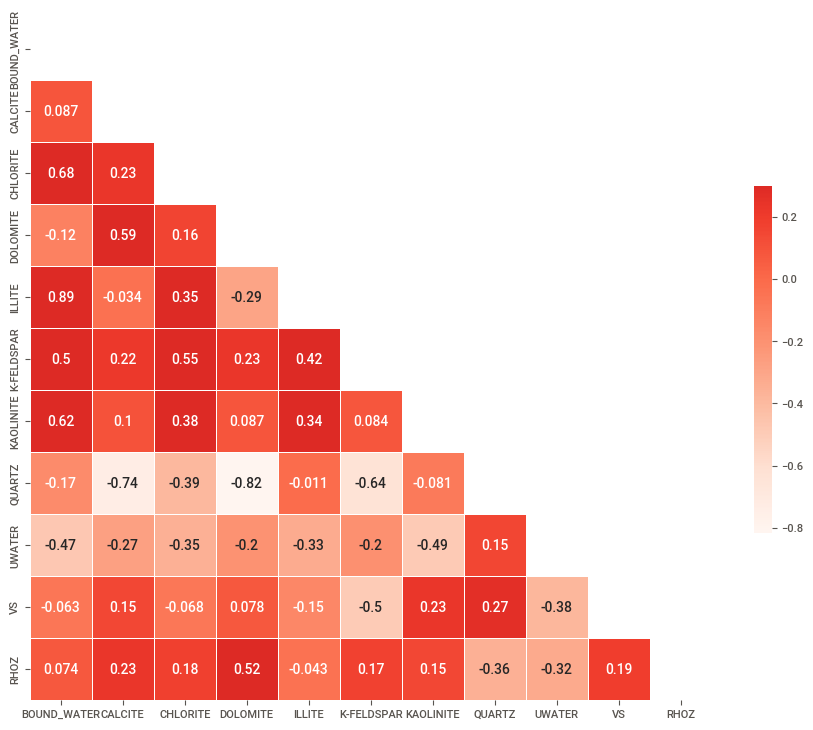

In [40]:
cols = ['BOUND_WATER','CALCITE','CHLORITE','DOLOMITE',#'HEMATITE',
            'ILLITE','K-FELDSPAR','KAOLINITE','QUARTZ','UWATER', 'VS','RHOZ']
corr = test_df_vs[cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(11, 9))
cmap = sns.diverging_palette(220, 20, as_cmap=True, center="light")
sns.heatmap(corr, mask=mask, cmap="Reds", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

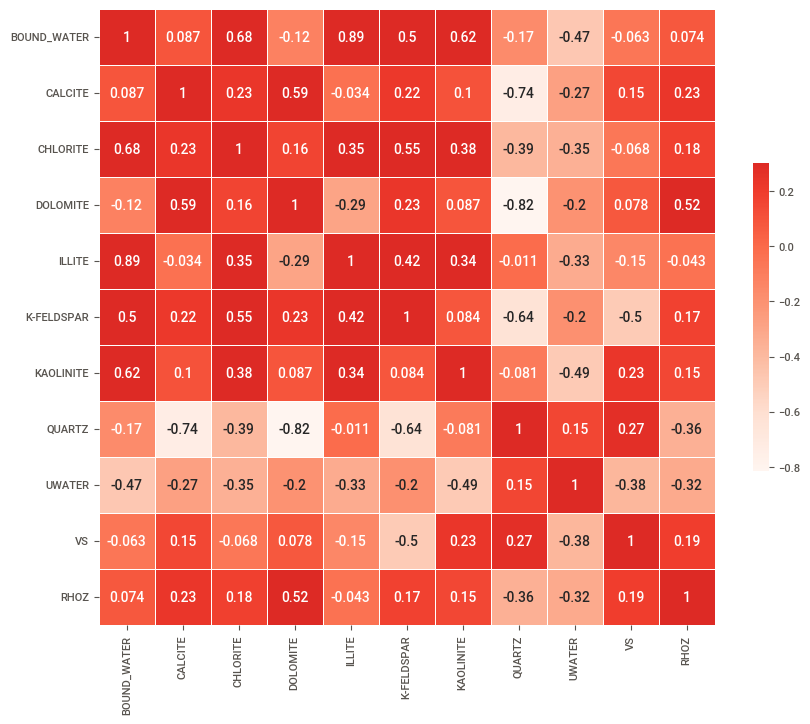

In [41]:
corr = test_df_vs[cols].corr()
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(corr, cmap="Reds", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

### Saving the files to local 

In [105]:
df.to_csv("DATASETS/df.csv", index=False)

train_df_vp.to_csv("DATASETS/train_df_vp.csv", index=False)
test_df_vp.to_csv("DATASETS/test_df_vp.csv", index=False)
test_df2_vp.to_csv("DATASETS/test_df2_vp.csv", index=False)

train_df_vs.to_csv("DATASETS/train_df_vs.csv", index=False)
test_df_vs.to_csv("DATASETS/test_df_vs.csv", index=False)
test_df2_vs.to_csv("DATASETS/test_df2_vs.csv", index=False)